In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

In [6]:
# # Load and resize images from selected classes
# loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# # Convert the loaded images per class into an array list
# images_array_dict = {}
# for class_name, images in loaded_images_dict.items():
#     images_array_dict[class_name] = np.array(images)

# # Transpose the dimensions of images_array to (num_samples, height, width, channels)
# # images_array = np.transpose(images_array, (0, 1, 2, 4, 3))

# # Define the augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=20,      # Rotate images randomly by up to 20 degrees
#     width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
#     height_shift_range=0.2, # Shift images vertically by up to 20% of the height
#     shear_range=0.2,        # Apply shear transformation with max intensity of 20%
#     zoom_range=0.2,         # Zoom in/out on images by up to 20%
#     horizontal_flip=True,   # Flip images horizontally
#     vertical_flip=True,     # Flip images vertically
#     fill_mode='nearest'     # Fill in missing pixels using nearest neighbors
# )


Generating augmented images for class: Apple Braeburn


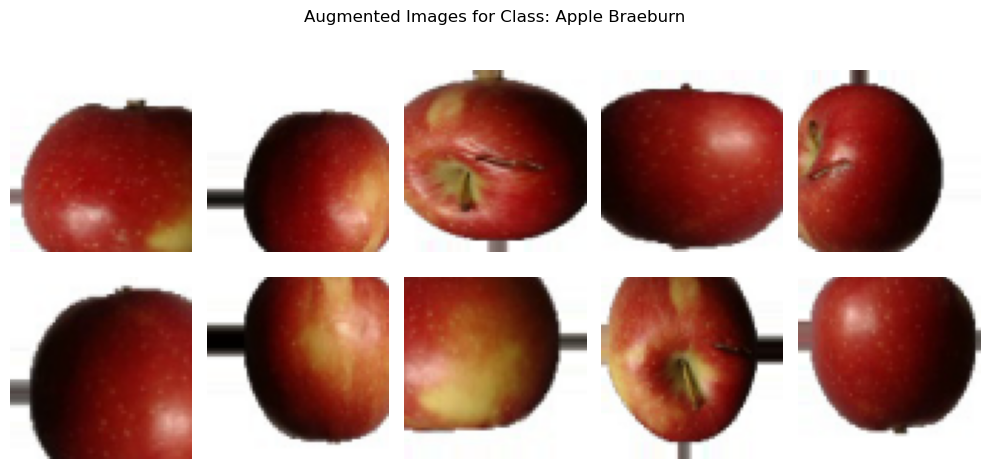

Generating augmented images for class: Banana


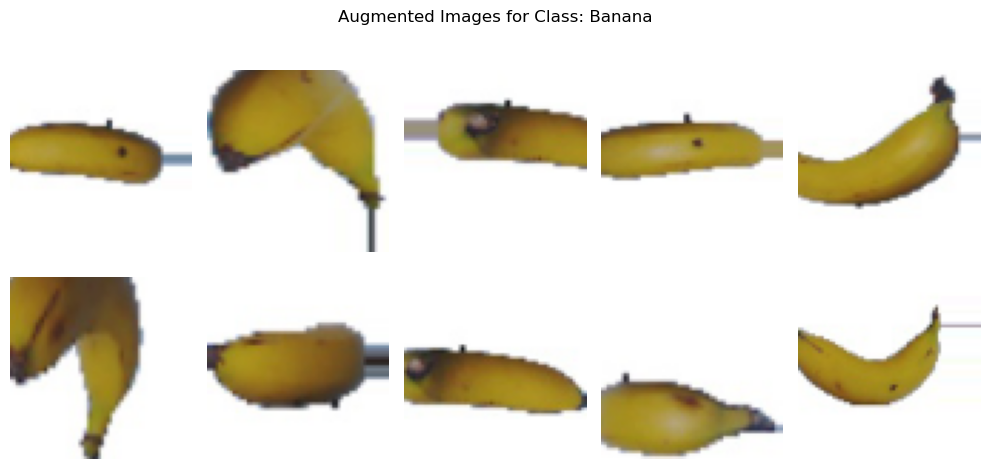

Generating augmented images for class: Lemon


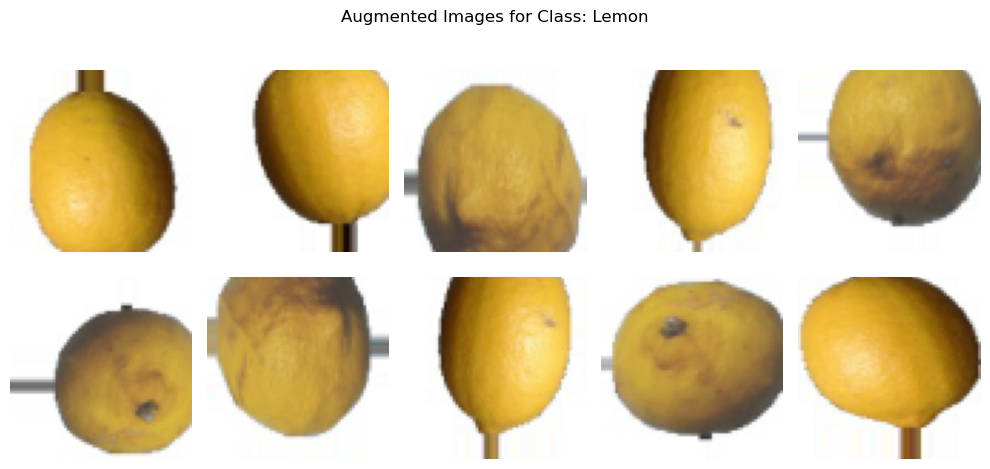

Generating augmented images for class: Limes


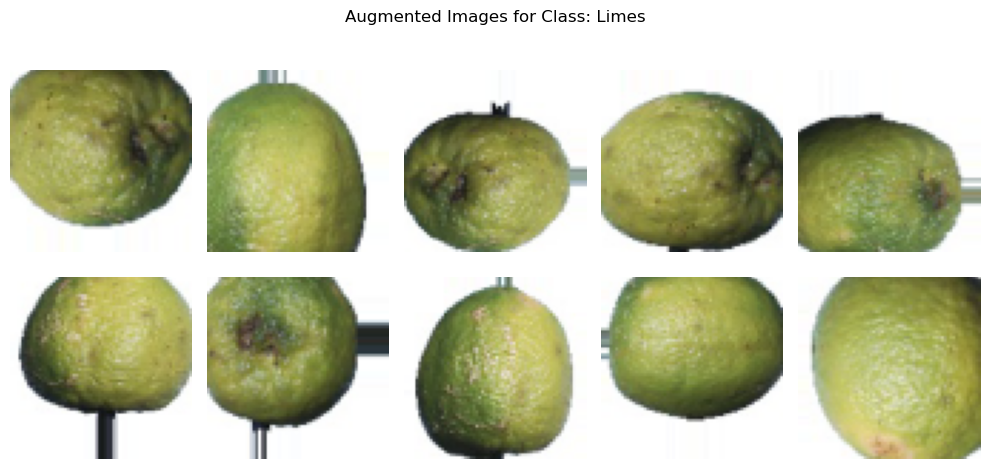

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate augmented images for each class
for class_name, images in images_array_dict.items():
    print(f"Generating augmented images for class: {class_name}")
    
    # Reshape images to rank 4 tensor
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 3)
    
    # Initialize generator for this class
    generator = datagen.flow(images, batch_size=1, shuffle=False)
    
    # Initialize subplot
    plt.figure(figsize=(10, 5))
    
    # Generate augmented images
    num_augmented_images = 0
    for batch in generator:
        augmented_image = batch[0]
        # Resize the augmented image
        resized_image = cv2.resize(augmented_image.astype(np.uint8), (64, 64))  # Change the size as needed
        # Plot the augmented image
        plt.subplot(2, 5, num_augmented_images + 1)
        plt.imshow(resized_image)
        plt.axis('off')
        num_augmented_images += 1
        if num_augmented_images >= 10:  # Generate 10 augmented images per class
            break
    
    plt.suptitle(f"Augmented Images for Class: {class_name}")
    plt.tight_layout()
    plt.show()


In [8]:
# # Load the model
# pretrained_model = tf.keras.models.load_model("my_model")

# # Use tf.io.gfile.exists instead of tf.gfile.Exists
# if tf.io.gfile.exists("my_model"):
#     print("Model directory exists")
# else:
#     print("Model directory does not exist")

Model directory exists


In [9]:
# # Compile the loaded model
# pretrained_model.compile(optimizer='adam',
#                          loss='sparse_categorical_crossentropy',
#                          metrics=['accuracy'])


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))

X = np.array(X)
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10



8/8 [==============================] - 6s 490ms/step - loss: 58078.4766 - accuracy: 0.2852 - val_loss: 29570.3906 - val_accuracy: 0.4688
Epoch 2/10
8/8 [==============================] - 3s 405ms/step - loss: 12938.2227 - accuracy: 0.4883 - val_loss: 9236.9854 - val_accuracy: 0.6562
Epoch 3/10
8/8 [==============================] - 3s 419ms/step - loss: 4165.6733 - accuracy: 0.7578 - val_loss: 1643.1422 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 3s 405ms/step - loss: 846.2269 - accuracy: 0.8711 - val_loss: 385.1201 - val_accuracy: 0.9062
Epoch 5/10
8/8 [==============================] - 3s 409ms/step - loss: 328.3497 - accuracy: 0.9180 - val_loss: 0.7868 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 3s 407ms/step - loss: 77.7946 - accuracy: 0.9688 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 3s 407ms/step - loss: 32.8481 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1

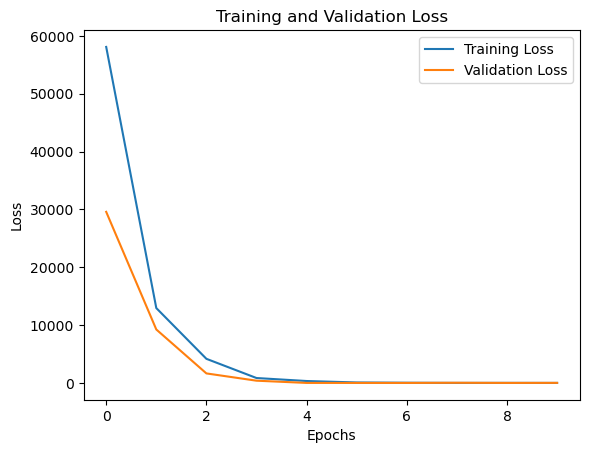

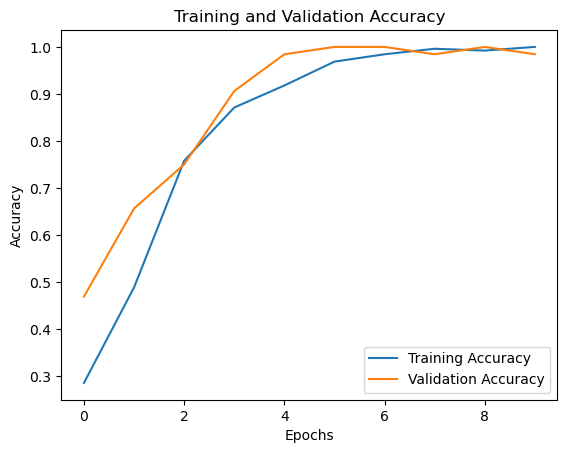

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Predicting classes for augmented images of class: Apple Braeburn
1/1 [==============================] - 0s 125ms/step


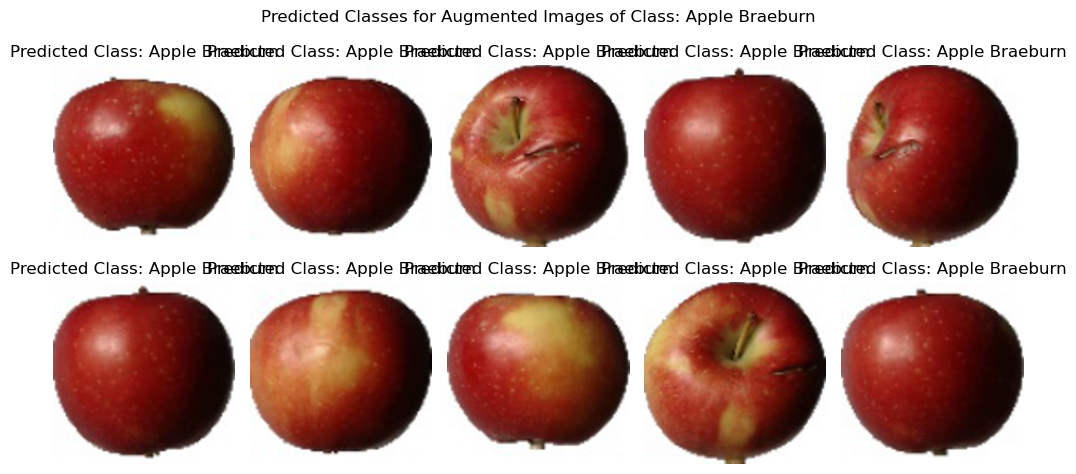

Predicting classes for augmented images of class: Banana
1/1 [==============================] - 0s 58ms/step


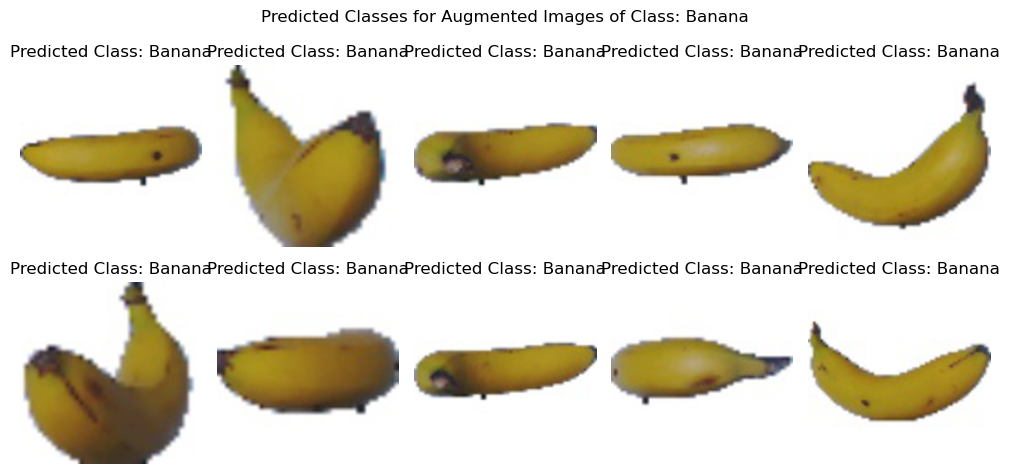

Predicting classes for augmented images of class: Lemon
1/1 [==============================] - 0s 77ms/step


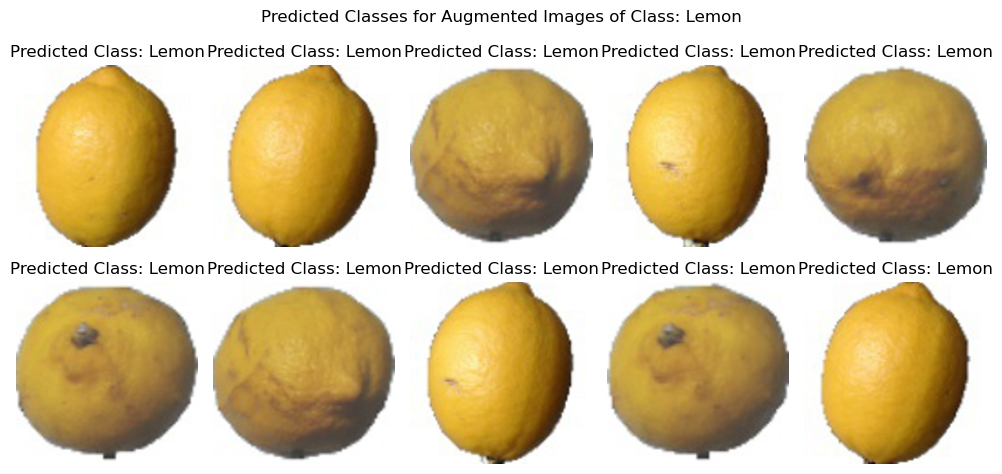

Predicting classes for augmented images of class: Limes
1/1 [==============================] - 0s 75ms/step


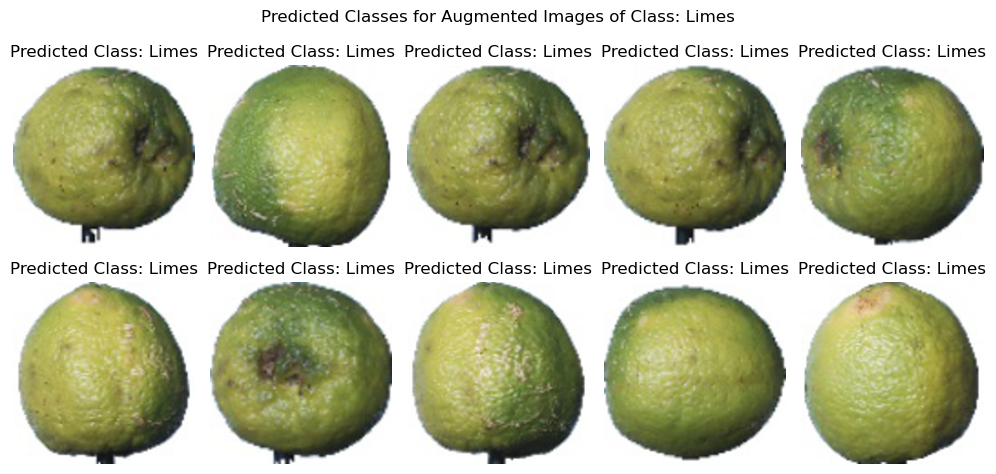

C:\Users\aemsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Load the saved model
saved_model_path = "my_model"
model = load_model(saved_model_path)

# Predict the classes of augmented images using the loaded model
for class_name, images in images_array_dict.items():
    print(f"Predicting classes for augmented images of class: {class_name}")
    
    # Initialize subplot
    plt.figure(figsize=(10, 5))
    
    # Predict classes for augmented images
    num_predicted_images = 0
    for augmented_image in images:
        # Resize the augmented image to match the input shape expected by the model
        resized_image = cv2.resize(augmented_image.astype(np.uint8), (224, 224))  # Change the size to match the model input shape
        # Predict the class label for the resized image
        prediction = model.predict(np.expand_dims(resized_image, axis=0))
        predicted_class = selected_classes[np.argmax(prediction)]
        # Plot the augmented image
        plt.subplot(2, 5, num_predicted_images + 1)
        plt.imshow(resized_image)
        plt.axis('off')
        plt.title(f"Predicted Class: {predicted_class}")
        num_predicted_images += 1
        if num_predicted_images >= 10:  # Predict classes for 10 augmented images per class
            break
    
    plt.suptitle(f"Predicted Classes for Augmented Images of Class: {class_name}")
    plt.tight_layout()
    plt.show()

model.save("model_with_augmentation.h5")

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model


# Load the saved model
saved_model_path = "my_model"
model = load_model(saved_model_path)

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(selected_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(selected_classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {selected_classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


NameError: name 'X_test' is not defined